In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import jaccard_score
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler


In [2]:
data1, data_y1 = make_classification(n_samples=500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=110)

data2, data_y2 = make_classification(n_samples=1000, n_classes=2, n_features=2, n_informative=2, n_redundant=0, class_sep = 2.5, n_clusters_per_class=1, flip_y=0)

data3, data_y3 = make_classification(n_samples=1500, n_classes=3, n_features=2, n_redundant=0, class_sep = 3, n_clusters_per_class=1, flip_y=0, random_state=50)

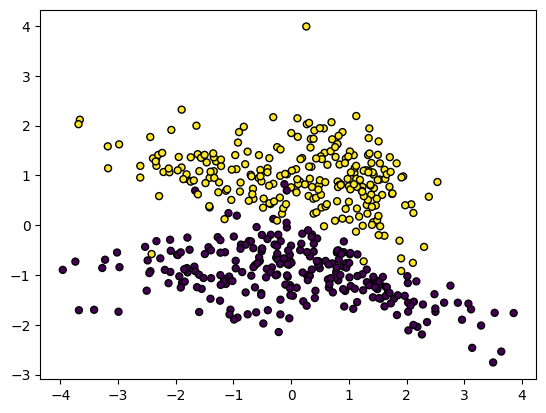

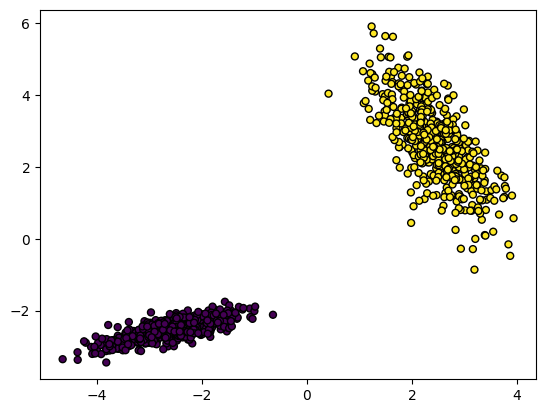

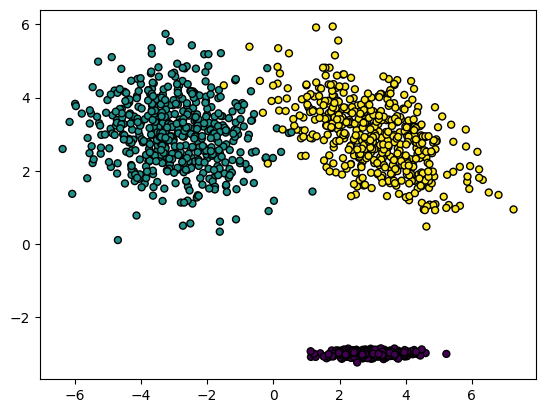

In [3]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", c=data_y1, s=25, edgecolor="k")
plt.show()

plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data_y2, s=25, edgecolor="k")
plt.show()

plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data_y3, s=25, edgecolor="k")
plt.show()

## K-means

Data1:

In [4]:
'''param_grid = {
    "n_init": range(5,30),
    'algorithm': ["lloyd",'elkan'],
    "n_clusters": range(2,10)
}

gridseach = GridSearchCV(KMeans(), param_grid=param_grid)
gridseach.fit(data1)
gridseach.best_params_
-> {'algorithm': 'elkan', 'n_clusters': 9, 'n_init': 6}'''

'param_grid = {\n    "n_init": range(5,30),\n    \'algorithm\': ["lloyd",\'elkan\'],\n    "n_clusters": range(2,10)\n}\n\ngridseach = GridSearchCV(KMeans(), param_grid=param_grid)\ngridseach.fit(data1)\ngridseach.best_params_\n-> {\'algorithm\': \'elkan\', \'n_clusters\': 9, \'n_init\': 6}'

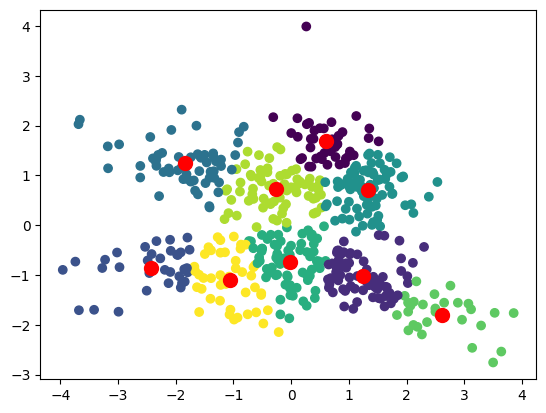

In [5]:
kmeans1 = KMeans(n_init = 6, algorithm='elkan', n_clusters = 9).fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

In [6]:
def Metrics(method, data, data_y):
    print(f'rand_score: {rand_score(method.labels_, data_y)}')
    print(f'jaccard_score: {jaccard_score(method.labels_, data_y, average = None)}')
    print(f'silhouette_score: {silhouette_score(data, method.labels_)}')
    print(f'davies_bouldin_score: {davies_bouldin_score(data, method.labels_)}')

In [7]:
Metrics(kmeans1, data1, data_y1)

rand_score: 0.6032945891783568
jaccard_score: [0.         0.02580645 0.         0.         0.         0.
 0.         0.         0.        ]
silhouette_score: 0.3738611473368969
davies_bouldin_score: 0.8238984788901267


Data2:

In [8]:
'''param_grid = {
    "n_init": range(5,30),
    'algorithm': ["lloyd",'elkan'],
    "n_clusters": range(2,10)
}

gridseach = GridSearchCV(KMeans(), param_grid=param_grid)
gridseach.fit(data2)
gridseach.best_params_
-> {'algorithm': 'elkan', 'n_clusters': 9, 'n_init': 15}'''

'param_grid = {\n    "n_init": range(5,30),\n    \'algorithm\': ["lloyd",\'elkan\'],\n    "n_clusters": range(2,10)\n}\n\ngridseach = GridSearchCV(KMeans(), param_grid=param_grid)\ngridseach.fit(data2)\ngridseach.best_params_\n-> {\'algorithm\': \'elkan\', \'n_clusters\': 9, \'n_init\': 15}'

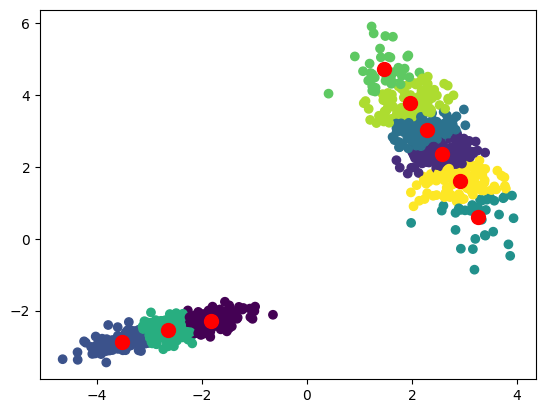

In [9]:
kmeans2 = KMeans(n_init = 15, algorithm='elkan', n_clusters = 9).fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

In [10]:
Metrics(kmeans2, data2, data_y2)

rand_score: 0.6429269269269269
jaccard_score: [0.312 0.238 0.    0.    0.    0.    0.    0.    0.   ]
silhouette_score: 0.39100599411780107
davies_bouldin_score: 0.8626234399732376


Data3:

In [11]:
'''param_grid = {
    "n_init": range(5,30),
    'algorithm': ["lloyd",'elkan'],
    "n_clusters": range(2,10)
}

gridseach = GridSearchCV(KMeans(), param_grid=param_grid)
gridseach.fit(data3)
gridseach.best_params_
-> {'algorithm': 'elkan', 'n_clusters': 9, 'n_init': 20} '''

'param_grid = {\n    "n_init": range(5,30),\n    \'algorithm\': ["lloyd",\'elkan\'],\n    "n_clusters": range(2,10)\n}\n\ngridseach = GridSearchCV(KMeans(), param_grid=param_grid)\ngridseach.fit(data3)\ngridseach.best_params_\n-> {\'algorithm\': \'elkan\', \'n_clusters\': 9, \'n_init\': 20} '

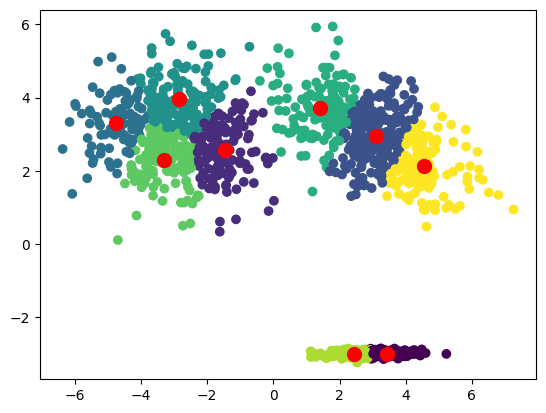

In [12]:
kmeans3 = KMeans(n_init = 20, algorithm='elkan', n_clusters = 9).fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

In [13]:
Metrics(kmeans3, data3, data_y3)

rand_score: 0.7878363353346676
jaccard_score: [0.532      0.23904382 0.448      0.         0.         0.
 0.         0.         0.        ]
silhouette_score: 0.41316799563899304
davies_bouldin_score: 0.8317870616332743


## AffinityPropagation

Data1:

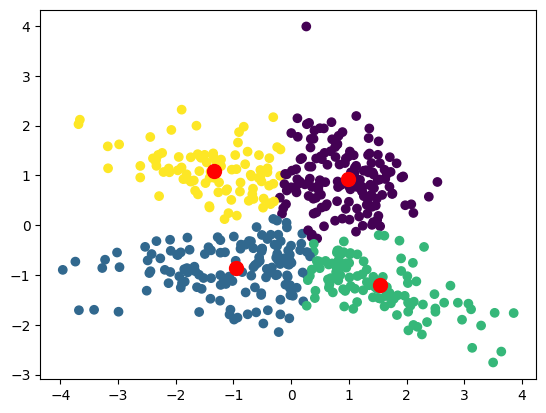

In [14]:
AP1 = AffinityPropagation(max_iter= 200, preference=-100, damping=0.8).fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=AP1.labels_)
plt.scatter(AP1.cluster_centers_[:,0], AP1.cluster_centers_[:,1], s=100, c='red')

In [15]:
Metrics(AP1, data1, data_y1)

rand_score: 0.720496993987976
jaccard_score: [0.015      0.00518135 0.         0.        ]
silhouette_score: 0.42532211394331315
davies_bouldin_score: 0.7941069373000531


Data2:

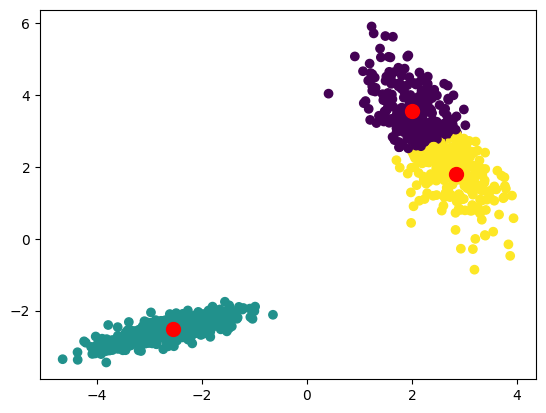

In [16]:
AP2 = AffinityPropagation(max_iter= 200, preference=-200, damping=0.8).fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=AP2.labels_)
plt.scatter(AP2.cluster_centers_[:,0], AP2.cluster_centers_[:,1], s=100, c='red')

In [17]:
Metrics(AP2, data2, data_y2)

rand_score: 0.8750750750750751
jaccard_score: [0. 0. 0.]
silhouette_score: 0.6771804697020318
davies_bouldin_score: 0.5509925186762206


Data3:

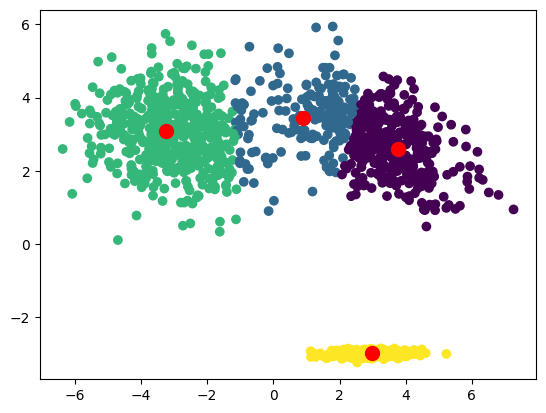

In [18]:
AP3 = AffinityPropagation(max_iter= 200, preference=-600, damping=0.8).fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=AP3.labels_)
plt.scatter(AP3.cluster_centers_[:,0], AP3.cluster_centers_[:,1], s=100, c='red')

In [19]:
Metrics(AP3, data3, data_y3)

rand_score: 0.9322472759617523
jaccard_score: [0.         0.06037152 0.00104058 0.        ]
silhouette_score: 0.6252599122673733
davies_bouldin_score: 0.6216768489337412


## DB-SCAN

Data1:

[-1  0]


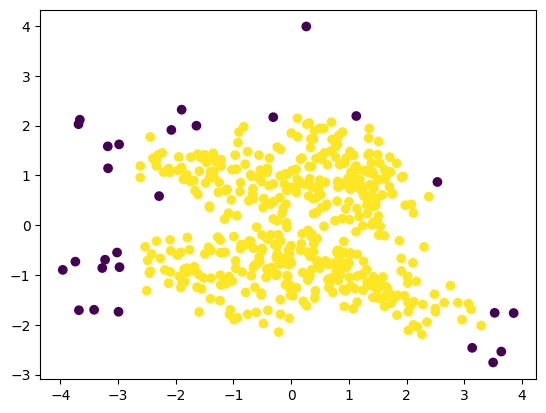

In [20]:
DB1 = DBSCAN(eps=0.4, min_samples=5).fit(data1)

print(np.unique(DB1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=DB1.labels_)

In [21]:
Metrics(DB1, data1, data_y1)

rand_score: 0.4990060120240481
jaccard_score: [0.         0.48870637 0.        ]
silhouette_score: 0.3973453595652447
davies_bouldin_score: 3.306620680220594


Data2:

[-1  0  1]


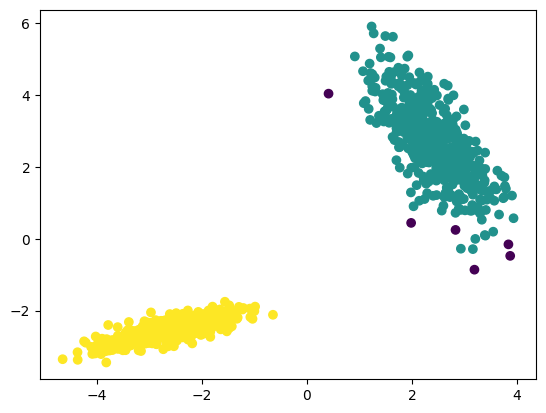

In [22]:
DB2 = DBSCAN(eps=0.4, min_samples=5).fit(data2)

print(np.unique(DB2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=DB2.labels_)

In [23]:
Metrics(DB2, data2, data_y2)

rand_score: 0.9940660660660661
jaccard_score: [0. 0. 0.]
silhouette_score: 0.6739969904833858
davies_bouldin_score: 0.932704594828711


Data3:

[-1  0  1  2]


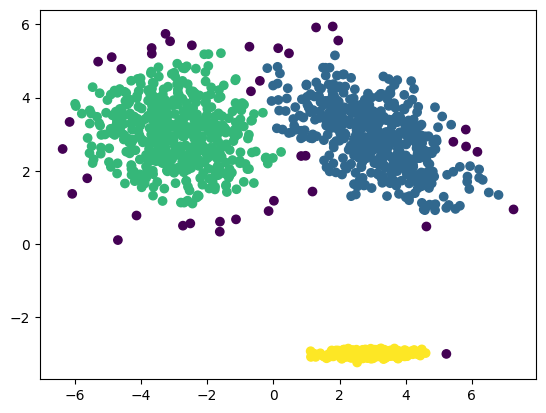

In [24]:
DB3 = DBSCAN(eps=0.4, min_samples=3).fit(data3)

print(np.unique(DB3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=DB3.labels_)

In [25]:
Metrics(DB3, data3, data_y3)

rand_score: 0.9770398043139871
jaccard_score: [0.         0.         0.94035785 0.        ]
silhouette_score: 0.6703002225705947
davies_bouldin_score: 1.6768315880973734


## Gaussian Mixtures734

In [26]:
'''param_grid = {
    "n_init": range(5,30),
    'covariance_type': ["full",'tied', 'diag', 'spherical'],
    'n_components': range(2,6)
}

gridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)
gridseach.fit(data1)
gridseach.best_params_
-> {'covariance_type': 'full', 'n_components': 4, 'n_init': 26} '''

'param_grid = {\n    "n_init": range(5,30),\n    \'covariance_type\': ["full",\'tied\', \'diag\', \'spherical\'],\n    \'n_components\': range(2,6)\n}\n\ngridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)\ngridseach.fit(data1)\ngridseach.best_params_\n-> {\'covariance_type\': \'full\', \'n_components\': 4, \'n_init\': 26} '

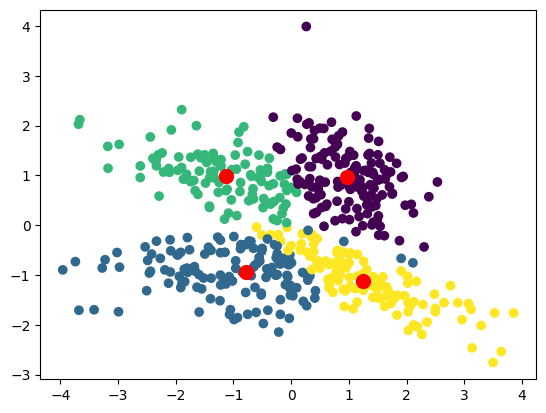

In [27]:
GM1 = GaussianMixture(n_components=4, n_init=26, covariance_type="full").fit(data1)
pred1=GM1.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c=GM1.predict(data1))
plt.scatter(GM1.means_[:,0], GM1.means_[:,1], s=100, c='red')

In [28]:
def Metrics2(method, data, data_y):
    print(f'rand_score: {rand_score(method, data_y)}')
    print(f'jaccard_score: {jaccard_score(method, data_y, average = None)}')
    print(f'silhouette_score: {silhouette_score(data, method)}')
    print(f'davies_bouldin_score: {davies_bouldin_score(data, method)}')

In [29]:
Metrics2(pred1, data1, data_y1)

rand_score: 0.7310701402805612
jaccard_score: [0.         0.00793651 0.         0.        ]
silhouette_score: 0.3866089425699502
davies_bouldin_score: 0.8662748591732925


Data2:

In [30]:
'''param_grid = {
    "n_init": range(5,30),
    'covariance_type': ["full",'tied', 'diag', 'spherical'],
    'n_components': range(2,6)
}

gridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)
gridseach.fit(data2)
gridseach.best_params_
-> {'covariance_type': 'full', 'n_components': 3, 'n_init': 15}'''

'param_grid = {\n    "n_init": range(5,30),\n    \'covariance_type\': ["full",\'tied\', \'diag\', \'spherical\'],\n    \'n_components\': range(2,6)\n}\n\ngridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)\ngridseach.fit(data2)\ngridseach.best_params_\n-> {\'covariance_type\': \'full\', \'n_components\': 3, \'n_init\': 15}'

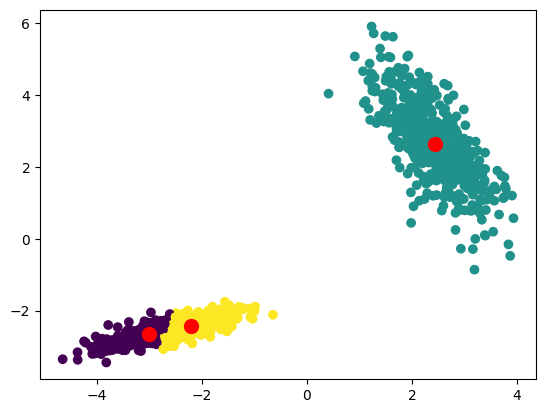

In [31]:
GM2 = GaussianMixture(n_components=3, n_init=15, covariance_type="full").fit(data2)
pred2=GM2.predict(data2)

plt.scatter(data2[:,0], data2[:,1], c=GM2.predict(data2))
plt.scatter(GM2.means_[:,0], GM2.means_[:,1], s=100, c='red')

In [32]:
Metrics2(pred2, data2, data_y2)

rand_score: 0.8802882882882883
jaccard_score: [0.396 1.    0.   ]
silhouette_score: 0.6230122152315674
davies_bouldin_score: 0.5681205718156036


Data3:

In [33]:
param_grid = {
    "n_init": range(5,30),
    'covariance_type': ["full",'tied', 'diag', 'spherical'],
    'n_components': range(2,6)
}

gridseach = GridSearchCV(GaussianMixture(), param_grid=param_grid)
gridseach.fit(data3)
gridseach.best_params_

{'covariance_type': 'full', 'n_components': 3, 'n_init': 5}

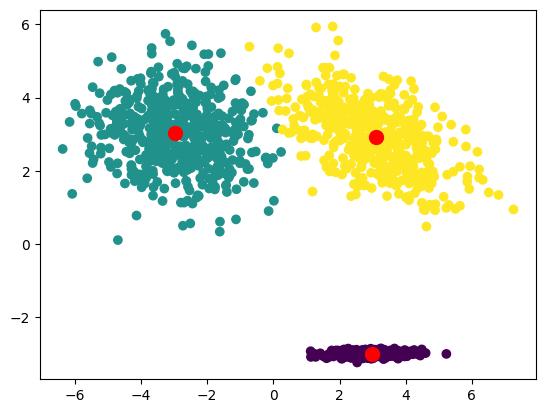

In [34]:
GM3 = GaussianMixture(n_components=3, n_init=12, covariance_type="full").fit(data3)
pred3=GM3.predict(data3)

plt.scatter(data3[:,0], data3[:,1], c=GM3.predict(data3))
plt.scatter(GM3.means_[:,0], GM3.means_[:,1], s=100, c='red')

In [35]:
Metrics2(pred3, data3, data_y3)

rand_score: 0.9938172114743162
jaccard_score: [1.         0.9860835  0.98611111]
silhouette_score: 0.7232949702092889
davies_bouldin_score: 0.412442799298758


## Иерархическая кластеризация

Data1:

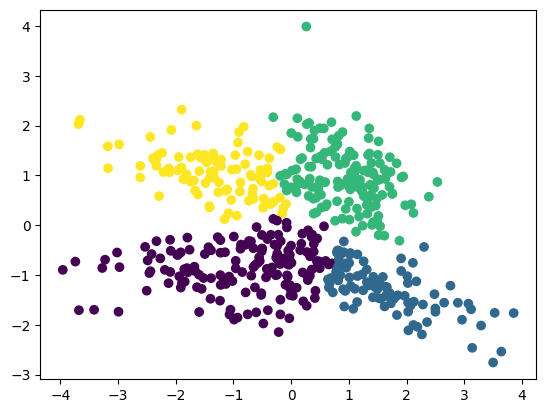

In [36]:
AC1 = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(data1)
plt.scatter(data1[:,0], data1[:,1], c=AC1.labels_)

In [37]:
Metrics(AC1, data1, data_y1)

rand_score: 0.7393426853707414
jaccard_score: [0.61960784 0.01488095 0.         0.        ]
silhouette_score: 0.416013288772024
davies_bouldin_score: 0.8042118223736636


Data2:

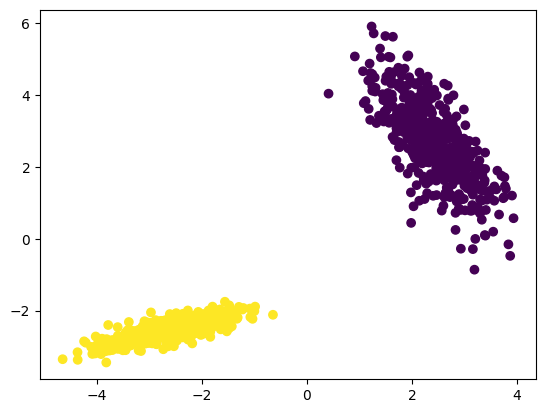

In [38]:
AC2 = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=AC2.labels_)

In [39]:
Metrics(AC2, data2, data_y2)

rand_score: 1.0
jaccard_score: [0. 0.]
silhouette_score: 0.8400296618304958
davies_bouldin_score: 0.22687300827121487


Data3:

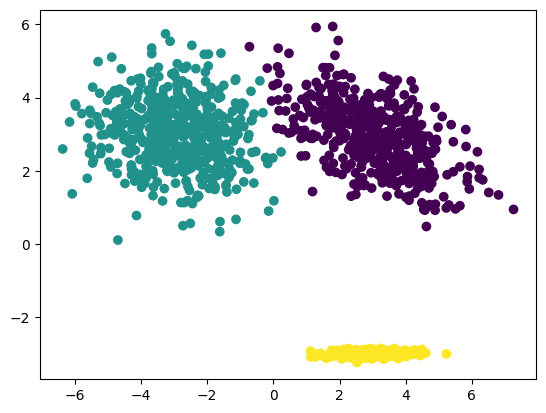

In [40]:
AC3 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data3)
plt.scatter(data3[:,0], data3[:,1], c=AC3.labels_)

In [41]:
Metrics(AC3, data3, data_y3)

rand_score: 0.9920667111407605
jaccard_score: [0.         0.98214286 0.        ]
silhouette_score: 0.7236809816374401
davies_bouldin_score: 0.41205965062138583


## Задание 2

In [42]:
data = pd.read_csv('../data/csgo_taskv2.csv')

In [43]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        122410 non-null  int64  
 1   time_left         122410 non-null  float64
 2   ct_score          122410 non-null  int64  
 3   t_score           122410 non-null  int64  
 4   map               122410 non-null  object 
 5   bomb_planted      122410 non-null  bool   
 6   ct_health         122410 non-null  int64  
 7   t_health          122410 non-null  int64  
 8   ct_armor          122410 non-null  int64  
 9   t_armor           122410 non-null  int64  
 10  ct_money          122410 non-null  int64  
 11  t_money           122410 non-null  int64  
 12  ct_helmets        122410 non-null  int64  
 13  t_helmets         122410 non-null  int64  
 14  ct_defuse_kits    122410 non-null  int64  
 15  ct_players_alive  122410 non-null  int64  
 16  t_players_alive   12

,Unnamed: 0,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,0,175.00,0,0,de_dust2,False,500,500,0,0,4000,4000,0,0,0,5,5
1,1,156.03,0,0,de_dust2,False,500,500,400,300,600,650,0,0,1,5,5
2,2,96.03,0,0,de_dust2,False,391,400,294,200,750,500,0,0,1,4,4
3,3,76.03,0,0,de_dust2,False,391,400,294,200,750,500,0,0,1,4,4
4,4,174.97,1,0,de_dust2,False,500,500,192,0,18350,10750,0,0,1,5,5
5,5,114.97,1,0,de_dust2,False,500,500,500,0,1750,10550,5,0,1,5,5
6,6,94.97,1,0,de_dust2,False,295,111,296,0,1700,5000,3,0,0,3,2
7,7,74.97,1,0,de_dust2,False,295,111,296,0,1700,5000,3,0,0,3,2
8,8,54.97,1,0,de_dust2,False,249,89,269,0,2300,2950,3,0,0,3,1
9,9,174.97,2,0,de_dust2,False,500,500,196,0,19800,23450,2,0,0,5,5


In [44]:
uniq = data["bomb_planted"]
uniq.unique()

array([False,  True])

In [45]:
for unique in uniq.unique():
    print(unique, uniq.loc[uniq == unique].count())

False 108726
True 13684


In [46]:
data_major_true = data[data['bomb_planted'] == True]
data_major_false = data[data['bomb_planted'] == False]

data_major_false_undersampled = data_major_false.sample(500)
data_major_true_undersampled = data_major_true.sample(500)
data = pd.concat([data_major_false_undersampled, data_major_true_undersampled], axis = 0)

y = data['bomb_planted']
for unique in y.unique():
    print(unique, y.loc[y == unique].count())

False 500
True 500


In [47]:
data = data.drop(['map'], axis=1)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 61524 to 29288
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   time_left         1000 non-null   float64
 2   ct_score          1000 non-null   int64  
 3   t_score           1000 non-null   int64  
 4   bomb_planted      1000 non-null   bool   
 5   ct_health         1000 non-null   int64  
 6   t_health          1000 non-null   int64  
 7   ct_armor          1000 non-null   int64  
 8   t_armor           1000 non-null   int64  
 9   ct_money          1000 non-null   int64  
 10  t_money           1000 non-null   int64  
 11  ct_helmets        1000 non-null   int64  
 12  t_helmets         1000 non-null   int64  
 13  ct_defuse_kits    1000 non-null   int64  
 14  ct_players_alive  1000 non-null   int64  
 15  t_players_alive   1000 non-null   int64  
dtypes: bool(1), float64(1), int64(14)
memory u

In [49]:
x_class=data.drop(['bomb_planted'],axis=1)
y_class=data['bomb_planted']

## KMeans

In [50]:
'''param_grid = {
    "n_init": range(5,30),
    'algorithm': ["lloyd",'elkan'],
   "n_clusters": range(2,10)
}

gridseach = GridSearchCV(KMeans(), param_grid=param_grid)
gridseach.fit(x_class)
gridseach.best_params_
-> {'algorithm': 'lloyd', 'n_clusters': 2, 'n_init': 12} '''

'param_grid = {\n    "n_init": range(5,30),\n    \'algorithm\': ["lloyd",\'elkan\'],\n   "n_clusters": range(2,10)\n}\n\ngridseach = GridSearchCV(KMeans(), param_grid=param_grid)\ngridseach.fit(x_class)\ngridseach.best_params_\n-> {\'algorithm\': \'lloyd\', \'n_clusters\': 2, \'n_init\': 12} '

In [51]:
kmeans4 = KMeans(n_init = 12, algorithm='lloyd', n_clusters = 2).fit(x_class)

Metrics(kmeans4, x_class, y_class)

rand_score: 0.4995175175175175
jaccard_score: [0.33997344 0.33198925]
silhouette_score: 0.5298384357944859
davies_bouldin_score: 0.6684173439781992


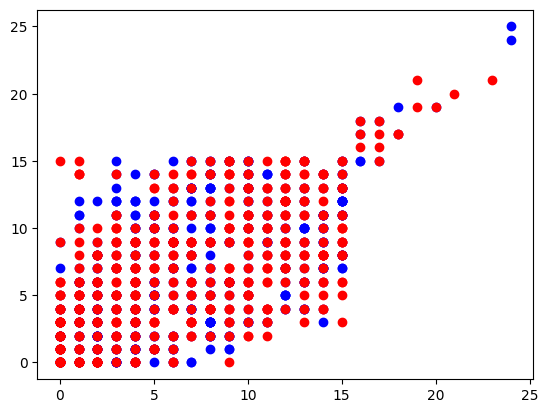

In [52]:
label = kmeans4.predict(x_class)
label_0 = x_class[label == 0]
label_1 = x_class[label == 1]

cols = x_class.columns

plt.scatter(label_0[cols[2]] , label_0[cols[3]], color = 'blue')
plt.scatter(label_1[cols[2]] , label_1[cols[3]], color = 'red')
plt.show()

## AffinityPropagation

In [53]:
AC = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(x_class)

Metrics(AC, x_class, y_class)

rand_score: 0.49957157157157156
jaccard_score: [0.38066095 0.26560232]
silhouette_score: 0.4847405202522841
davies_bouldin_score: 0.6849906935054217


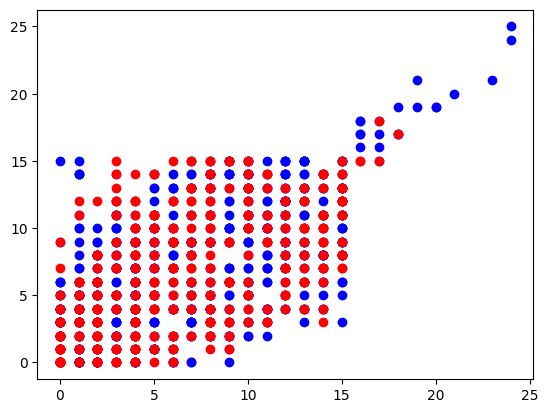

In [54]:
label = AC.labels_
label_0 = x_class[label == 0]
label_1 = x_class[label == 1]

cols = x_class.columns

plt.scatter(label_0[cols[2]] , label_0[cols[3]], color = 'blue')
plt.scatter(label_1[cols[2]] , label_1[cols[3]], color = 'red')
plt.show()

## DB-SCAN

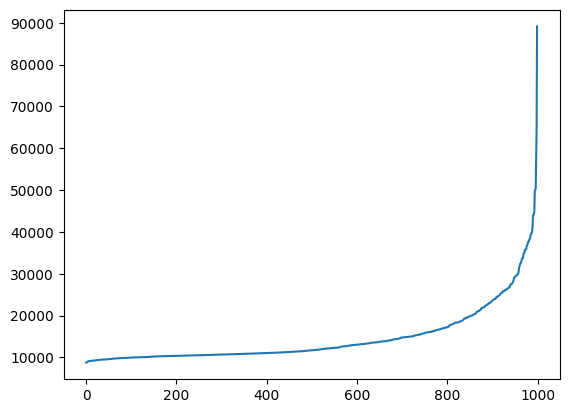

In [55]:
nbrs = NearestNeighbors(n_neighbors=180).fit(x_class)
distances, indices = nbrs.kneighbors(x_class)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

In [56]:
DB = DBSCAN(eps=10000, min_samples=5).fit(x_class)

Metrics(DB, x_class, y_class)

rand_score: 0.5063883883883884
jaccard_score: [0.    0.439 0.   ]
silhouette_score: 0.10853504999677233
davies_bouldin_score: 1.6868548253911733


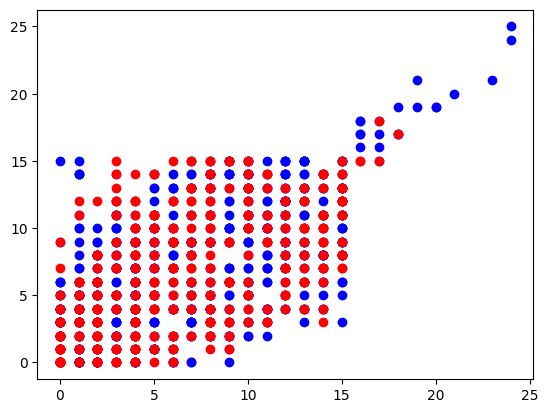

In [57]:
label = AC.labels_
label_0 = x_class[label == 0]
label_1 = x_class[label == 1]

cols = x_class.columns

plt.scatter(label_0[cols[2]] , label_0[cols[3]], color = 'blue')
plt.scatter(label_1[cols[2]] , label_1[cols[3]], color = 'red')
plt.show()

## My KMeans

In [58]:
class MyKMeans:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
    
    def distance(self, centroid, dots):
        return np.sqrt(np.sum((centroid[:, np.newaxis] - dots) ** 2, axis=2))

    def fit(self, x):
        self.centroids = x[np.random.choice(x.shape[0], self.n_clusters, replace=False)]

        for iteration in range(self.max_iterations):
            new_centroids = self.update_centroids(x)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
            
    def predict(self, x):
        distances = self.distance(x, self.centroids)
        
        return np.argmin(distances, axis=1)

    def update_centroids(self, x):
        distances = self.distance(x, self.centroids)
        clasters = np.argmin(distances, axis=1)
        
        return np.array([np.mean(x[clasters == i], axis=0) for i in range(self.n_clusters)])

In [59]:
MyKmeans = MyKMeans(n_clusters = 2, max_iterations=200)
MyKmeans.fit(data1)
predict = MyKmeans.predict(data1)

print(f'rand_score: {rand_score(predict, data_y1)}')
print(f'jaccard_score: {jaccard_score(predict, data_y1, average = None)}')
print(f'silhouette_score: {silhouette_score(data1, predict)}')
print(f'davies_bouldin_score: {davies_bouldin_score(data1, predict)}')

rand_score: 0.9084248496993989
jaccard_score: [0.01652893 0.03252033]
silhouette_score: 0.3328209203406766
davies_bouldin_score: 1.2885317439264852
